## imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

## over-sampled data

In [2]:
# read data

df_o = pd.read_csv('over-sample.csv')

In [3]:
# choose train and test variable

X = df_o.drop('Outcome', axis=1)
y = df_o['Outcome']

In [4]:
# scale data

scaler = StandardScaler()
scaler.fit(X)
Xstd = scaler.transform(X)
X = Xstd

#train test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=101)

In [5]:
# accuracy of over-sampled data with 25% test size

from sklearn.svm import SVC
model = SVC()
model.fit(X_train, y_train)
pred= model.predict(X_test)
from sklearn.metrics import accuracy_score 
accuracy_score(y_test, pred)

0.7545454545454545

### Sigmoid SVM

In [7]:
# basic model (to put best params in after grid search)

from sklearn.svm import SVC

svm_sigmoid = SVC(kernel="sigmoid",gamma=0.5)
svm_sigmoid.fit(X_train,y_train)
print("Accuracy of svm(sigmoid): %",svm_sigmoid.score(X_test,y_test)*100)

Accuracy of svm(sigmoid): % 58.63636363636363


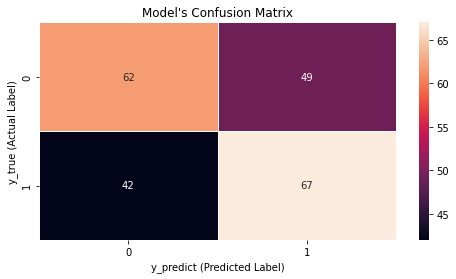

True negative =  62
False positive =  49
False negative =  42
True positive =  67
              precision    recall  f1-score   support

           0       0.60      0.56      0.58       111
           1       0.58      0.61      0.60       109

    accuracy                           0.59       220
   macro avg       0.59      0.59      0.59       220
weighted avg       0.59      0.59      0.59       220



In [8]:
# sigmoid svm performance analysis (before grid search)

#confusion matrix 
y_pred = svm_sigmoid.predict(X_test)
y_true = y_test

# 0 value is negative
# 1 value is positive
cmatrix_sigmoid  = confusion_matrix(y_true,y_pred,labels=[0,1])

f,ax = plt.subplots(figsize=(8,4))
sns.heatmap(cmatrix_sigmoid,annot=True,linewidths=0.5,cbar=True,linecolor="white",fmt='.0f',ax=ax)
plt.title("Model's Confusion Matrix")
plt.xlabel("y_predict (Predicted Label)")
plt.ylabel("y_true (Actual Label)")
plt.show()

print('True negative = ', cmatrix_sigmoid[0][0])
print('False positive = ', cmatrix_sigmoid[0][1])
print('False negative = ', cmatrix_sigmoid[1][0])
print('True positive = ', cmatrix_sigmoid[1][1])

from sklearn.metrics import classification_report
print(classification_report(y_true,y_pred))

#### grid search

In [9]:
# grid search

from sklearn.svm import SVC
param_grid = { 
   'gamma': np.arange(0,1,0.1),
    'coef0': np.logspace(-3, 2, 10)
}
svm_sigmoid = SVC(kernel="sigmoid")
svm_gscv4 = GridSearchCV(svm_sigmoid,param_grid) #cv default = 5
svm_gscv4.fit(X_train,y_train)

print("Tuned best parameters for kernel poly svm: ",svm_gscv4.best_params_ ) 
print("Best score: {}".format(svm_gscv4.best_score_))

Tuned best parameters for kernel poly svm:  {'coef0': 0.046415888336127795, 'gamma': 0.1}
Best score: 0.7326046726810086


In [12]:
# basic model (with best params)

from sklearn.svm import SVC

svm_sigmoid = SVC(C=0.046415888336127795, kernel="sigmoid",gamma=0.5)
svm_sigmoid.fit(X_train,y_train)
print("Accuracy of svm(sigmoid): %",svm_sigmoid.score(X_test,y_test)*100)

Accuracy of svm(sigmoid): % 66.81818181818183


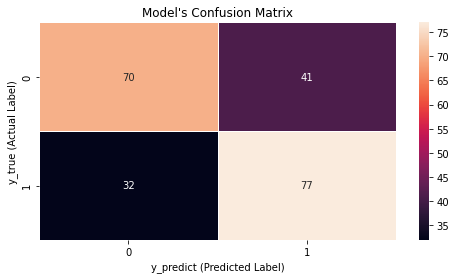

True negative =  70
False positive =  41
False negative =  32
True positive =  77
              precision    recall  f1-score   support

           0       0.69      0.63      0.66       111
           1       0.65      0.71      0.68       109

    accuracy                           0.67       220
   macro avg       0.67      0.67      0.67       220
weighted avg       0.67      0.67      0.67       220



In [15]:
# sigmoid svm performance analysis (after grid search)

#confusion matrix 
y_pred = svm_sigmoid.predict(X_test)
y_true = y_test

# 0 value is negative
# 1 value is positive
cmatrix_sigmoid  = confusion_matrix(y_true,y_pred,labels=[0,1])

f,ax = plt.subplots(figsize=(8,4))
sns.heatmap(cmatrix_sigmoid,annot=True,linewidths=0.5,cbar=True,linecolor="white",fmt='.0f',ax=ax)
plt.title("Model's Confusion Matrix")
plt.xlabel("y_predict (Predicted Label)")
plt.ylabel("y_true (Actual Label)")
plt.show()

print('True negative = ', cmatrix_sigmoid[0][0])
print('False positive = ', cmatrix_sigmoid[0][1])
print('False negative = ', cmatrix_sigmoid[1][0])
print('True positive = ', cmatrix_sigmoid[1][1])

from sklearn.metrics import classification_report
print(classification_report(y_true,y_pred))


#### cross validation

In [13]:
# cross validation

sigmoid_svc = SVC(C=0.046415888336127795,kernel='sigmoid',gamma=0.1)
sigmoid_svc.fit(X,y)
sigmoid_svc_result = cross_validate(sigmoid_svc,X, y, cv=5,scoring='accuracy',return_train_score=True)
print("Cv:5, Test Score: {}".format(sigmoid_svc_result['test_score']))
print("Cv:5, Train Score: {}".format(sigmoid_svc_result['train_score']))


accuracy = cross_val_score(sigmoid_svc,X,y,cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (accuracy.mean(),accuracy.std() * 2))
f1 = cross_val_score(sigmoid_svc,X,y,cv=5,scoring='f1')
print('F1 Score : ',f1)

mse = cross_val_score(sigmoid_svc,X,y,cv=5,scoring='neg_mean_squared_error')
print('Negative Mean Squared Error: ', mse)
print("Cv = 5, recall = ",cross_val_score(sigmoid_svc, X, y, scoring='recall'))
print("Cv = 5, precision = ",cross_val_score(sigmoid_svc, X, y, scoring='precision'))

Cv:5, Test Score: [0.72727273 0.70454545 0.71590909 0.73142857 0.78285714]
Cv:5, Train Score: [0.73646724 0.73646724 0.73504274 0.72403983 0.7083926 ]
Accuracy: 0.73 (+/- 0.05)
F1 Score :  [0.71764706 0.70454545 0.70930233 0.71165644 0.77906977]
Negative Mean Squared Error:  [-0.27272727 -0.29545455 -0.28409091 -0.26857143 -0.21714286]
Cv = 5, recall =  [0.69318182 0.70454545 0.69318182 0.66666667 0.76136364]
Cv = 5, precision =  [0.74390244 0.70454545 0.72619048 0.76315789 0.79761905]


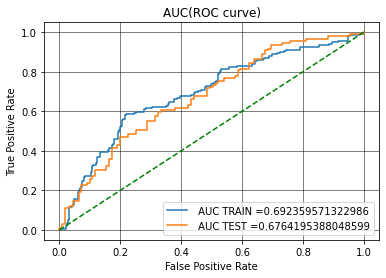

In [14]:
# roc curve of train and test accuracy

from sklearn import svm
from sklearn.model_selection import GridSearchCV  
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier

np.random.seed(0)

random_state = np.random.RandomState(0)
classifier = OneVsRestClassifier(svm.SVC(kernel='sigmoid', probability=True,
                                 random_state=random_state))
classifier.fit(X_train, y_train)

y_train_pred = classifier.decision_function(X_train)    
y_test_pred = classifier.decision_function(X_test) 

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.grid()

plt.plot(train_fpr, train_tpr, label=" AUC TRAIN ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label=" AUC TEST ="+str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1],'g--')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC(ROC curve)")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()
#when AUC is 0.5-1, high chance that classifier is able to distinguish positive class valuces from negative class (detect more true positive and true negative)